In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


[1.61290323 1.70357751 1.7699115 ]
[1.68107611 1.785284   1.88001483]


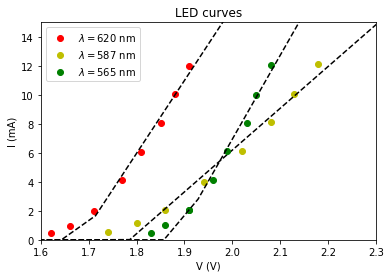

In [3]:
from scipy import optimize

def diode_func(x, va, r):    
    y = (x - va) / r
    y[y<0] = 0
    return y

olmb_fit = np.array([])
va_fit = np.array([])

def process_raw(raw, lmb, popt):
    global olmb_fit, va_fit
    dat = np.array(raw)
    i = dat[::2]
    v = dat[1::2]
    
    #v = v[i>3]
    #i = i[i>3]
    
    plt.plot(v,i,popt,label="$\lambda=$"+str(lmb)+" nm")
    
    guess_va = 1.5   # 1.5 volts
    guess_r  = 0.010 # 10 Ohms

    par, cov = optimize.curve_fit(diode_func, v, i, p0=[guess_va, guess_r])
    va = par[0]
    r  = par[1]    
    xv = np.linspace(1.5,5.0,50)
    yf = diode_func(xv, va, r)
    plt.plot(xv,yf,"k--")
    olmb_fit = np.append(olmb_fit, 1000.0/lmb)
    va_fit = np.append(va_fit, va)


raw_red = [
    0.44, 1.62,
    0.95, 1.66,
    1.99, 1.71,
    4.15, 1.77,
    6.05, 1.81,
    8.09, 1.85,
    10.04, 1.88,
    12.02, 1.91    
]    

raw_yellow = [
    0.51, 1.74,
    1.16, 1.80,
    2.08, 1.86,
    3.96, 1.94,
    6.10, 2.02,
    8.10, 2.08,
    10.07, 2.13,
    12.11, 2.18
]    

raw_green = [
    0.50, 1.83,
    0.99, 1.86,
    2.03, 1.91,
    2.03, 1.91,
    4.13, 1.96,
    6.16, 1.99,
    8.09, 2.03,
    9.99, 2.05,
    12.07, 2.08,
]

# outlyer
raw_blue = [
    0.51, 2.83,
    1.00, 3.08,
    2.00, 3.35,
    4.08, 3.68,
    6.07, 3.87,
    8.00, 4.01,
    10.03, 4.12,
    12.03, 4.21,
]

process_raw(raw_red, 620, "ro")
process_raw(raw_yellow, 587, "yo")
process_raw(raw_green, 565, "go")
#process_raw(raw_blue, 460, "bo")
plt.legend()             
plt.xlim(1.6,2.3)
plt.ylim(0,15.0)
plt.ylabel("I (mA)")
plt.xlabel("V (V)")
plt.title("LED curves")
print(olmb_fit)
print(va_fit)

plt.savefig("led_curves.pdf")


[1.613 1.704 1.77 ]
[1.681 1.785 1.88 ]


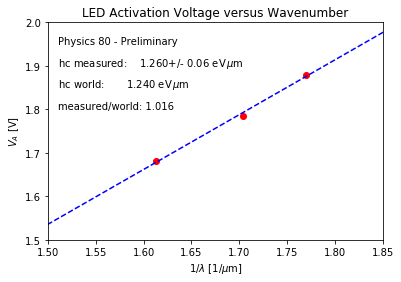

In [7]:
def line_func(x, m, b):    
    return m * x + b

print(olmb_fit)
print(va_fit)

# override with by-eye value
#va_fit[3] = 2.5

plt.plot(olmb_fit,va_fit,"ro",label="LED fit")
guess_m = 1.0   # 1.5 volts
guess_b = 0.0 # 10 Ohms
par, cov = optimize.curve_fit(line_func, olmb_fit, va_fit, p0=[guess_m, guess_b])
mfit = par[0]
bfit = par[1]

xv = np.linspace(0,5.0,20)
yf = line_func(xv, mfit, bfit)
plt.plot(xv,yf,"b--",label="linear fit")

plt.xlim(1.5,1.85)
plt.ylim(1.5,2.0)
plt.xlabel("1/$\lambda$ [1/$\mu$m]")
plt.ylabel("$V_A$ [V]")
plt.title("LED Activation Voltage versus Wavenumber")

hc = 1.23984193
mfitr = np.around(mfit,decimals=3)
hcr = np.around(hc,decimals=4)

plt.text(1.51, 1.95, "Physics 80 - Preliminary")
np.set_printoptions(precision=3)
plt.text(1.51, 1.90, "hc measured:    "+str(format(mfit, '.3f'))+"+/- 0.06 eV$\,\mu$m")
plt.text(1.51, 1.85, "hc world:       "+str(format(hc, '.3f'))+" eV$\,\mu$m")
plt.text(1.51, 1.80, "measured/world: "+str(format(mfit/hc, '.3f')))


plt.savefig("planck.pdf")

